In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

In [186]:
df = pd.read_csv('data/drexler_complete_lyrics.csv', sep=';')
df.sample(10)

,id,lyrics,title,url,album,duplicated,year
125,3204469,Desde lo profundo de los cromosomas De los as...,Mandato,https://genius.com/Jorge-drexler-mandato-lyrics,Salvavidas de hielo,False,2017
27,1073134,Cuatro estrellas blancas sobre fondo negro Es ...,Luna negra,https://genius.com/Jorge-drexler-luna-negra-ly...,Vaivén,False,1996
105,1033827,Estoy aquí de paso Yo soy un pasajero No quier...,Tres Mil Millones de Latidos,https://genius.com/Jorge-drexler-tres-mil-mill...,Amar la trama,False,2010
115,1945620,Que el pulso no me tiemble en el ultimo instan...,La plegaria del paparazzo,https://genius.com/Jorge-drexler-la-plegaria-d...,Bailar en la cueva,False,2014
7,1053846,Mírenla salir sobre la marea Nadie que la ve c...,Un solo color,https://genius.com/Jorge-drexler-un-solo-color...,La Luz Que Sabe Robar,False,1992
33,1737867,"Mabel, dejó El bolso con unas amigas Y salió a...",La luna de espejos,https://genius.com/Jorge-drexler-la-luna-de-es...,Vaivén,True,1996
89,1857817,Aquel mensaje que no debió haber leído Aquel b...,La Infidelidad De La Era Informatica,https://genius.com/Jorge-drexler-la-infidelida...,12 Segundos de Oscuridad,False,2006
118,1973448,Mi anhelo no está Mi anhelo se fue detrás de t...,Universos paralelos,https://genius.com/Jorge-drexler-universos-par...,Bailar en la cueva,False,2014
80,1002897,"Tu beso se hizo calor Luego el calor, movimien...",Todo se transforma,https://genius.com/Jorge-drexler-todo-se-trans...,Eco,False,2004
54,1230721,No somos mas Que una gota de luz Una estrella ...,La edad del cielo,https://genius.com/Jorge-drexler-la-edad-del-c...,Frontera,False,1999


### Let's start with wordcount
##### Following: http://sigdelta.com/blog/text-analysis-in-pandas/

In [187]:
df['words'] = df.lyrics.str.strip().str.split('[\W_]+')

In [188]:
rows = list()
for row in df[['words']].iterrows():
    r = row[1]
    for word in r.words:
        rows.append((word))

words = pd.DataFrame(rows, columns=['word'])
words.head()

,word
0,El
1,perfume
2,de
3,la
4,sal


In [189]:
#Remove empty rows and cases
words = words[words.word.str.len() > 0]
words['word'] = words.word.str.lower()
words.head()

,word
0,el
1,perfume
2,de
3,la
4,sal


In [190]:
#Word count per song
counts = words\
    .word.value_counts()\
    .to_frame()\
    .rename(columns={'word':'n_w'})
counts

,n_w
de,858
que,689
la,686
el,611
y,559
en,513
no,377
a,338
un,271
tu,269


## So, from this we get to know two important facts
 - Most used words in Jorge Drexler's songs are 'de', 'que', 'la', 'el' and 'y'
 - We need to exclude stopwords.

In [191]:
from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

In [192]:
for a_stopword in stopwords:
    if a_stopword in counts.index:
        counts = counts.drop(a_stopword)

In [193]:
counts.head(20)

,n_w
na,120
mar,108
tiempo,82
noche,67
luna,63
corazón,57
bailar,53
si,50
cada,50
va,50


### WTF is that 'na' topping the list?

In [194]:
songs = list()
for row in df[['title','words']].iterrows():
    r = row[1]
    if 'na' in r.words:
        songs.append(r.title)

songs

['Estalactitas']

### Now it's pretty obvious, just listen to the song.

In [195]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/YFBe7hLUPKo?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')


In [196]:
counts = counts.drop('na')

In [197]:
counts.head(20)

,n_w
mar,108
tiempo,82
noche,67
luna,63
corazón,57
bailar,53
si,50
cada,50
va,50
dos,49


In [198]:
words_by_album = {}
words_by_year = {}
top_five_words = counts.head(5).index
for row in df[['album','words','year']].iterrows():
    r = row[1]
    if r.album == 'Others':
        continue
    if r.album not in words_by_album:
        words_by_album[r.album] = {
            top_five_words[0]: 0,
            top_five_words[1]: 0,
            top_five_words[2]: 0,
            top_five_words[3]: 0,
            top_five_words[4]: 0
        }
    if r.year not in words_by_year:
        words_by_year[r.year] = {
            top_five_words[0]: 0,
            top_five_words[1]: 0,
            top_five_words[2]: 0,
            top_five_words[3]: 0,
            top_five_words[4]: 0
        }
    for a_word in r.words:
        if a_word == top_five_words[0]:
            words_by_album[r.album][top_five_words[0]] += 1
            words_by_year[r.year][top_five_words[0]] += 1
        if a_word == top_five_words[1]:
            words_by_album[r.album][top_five_words[1]] += 1
            words_by_year[r.year][top_five_words[1]] += 1
        if a_word == top_five_words[2]:
            words_by_album[r.album][top_five_words[2]] += 1
            words_by_year[r.year][top_five_words[2]] += 1
        if a_word == top_five_words[3]:
            words_by_album[r.album][top_five_words[3]] += 1
            words_by_year[r.year][top_five_words[3]] += 1
        if a_word == top_five_words[4]:
            words_by_album[r.album][top_five_words[4]] += 1
            words_by_year[r.year][top_five_words[4]] += 1

In [199]:
top_five_words

Index(['mar', 'tiempo', 'noche', 'luna', 'corazón'], dtype='object')

In [208]:
ROWS = 4
COLS = 3
max_appearance = 0
for album in words_by_album:
    for word in words_by_album[album]:
        a_number = words_by_album[album][word]
        if a_number > max_appearance:
            max_appearance = a_number

albums_ordered_by_year = [
    'La Luz Que Sabe Robar', 'Radar', 'Vaivén', 
    'Llueve', 'Frontera', 'Sea', 
    'Eco', '12 Segundos de Oscuridad','Amar la trama',
    'Bailar en la cueva', 'Salvavidas de hielo'
]
years_for_albums = [
    1992, 1994, 1996, 1997, 1999, 
    2001, 2004, 2006, 2010, 2014, 
    2017
]

colormap = {
    'mar': 'xkcd:royal blue',
    'tiempo': 'xkcd:mustard',
    'luna': 'grey',
    'noche': 'black',
    'corazón': 'xkcd:crimson' 
}

def autolabel(rects, x, y):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        axes[x,y].text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')


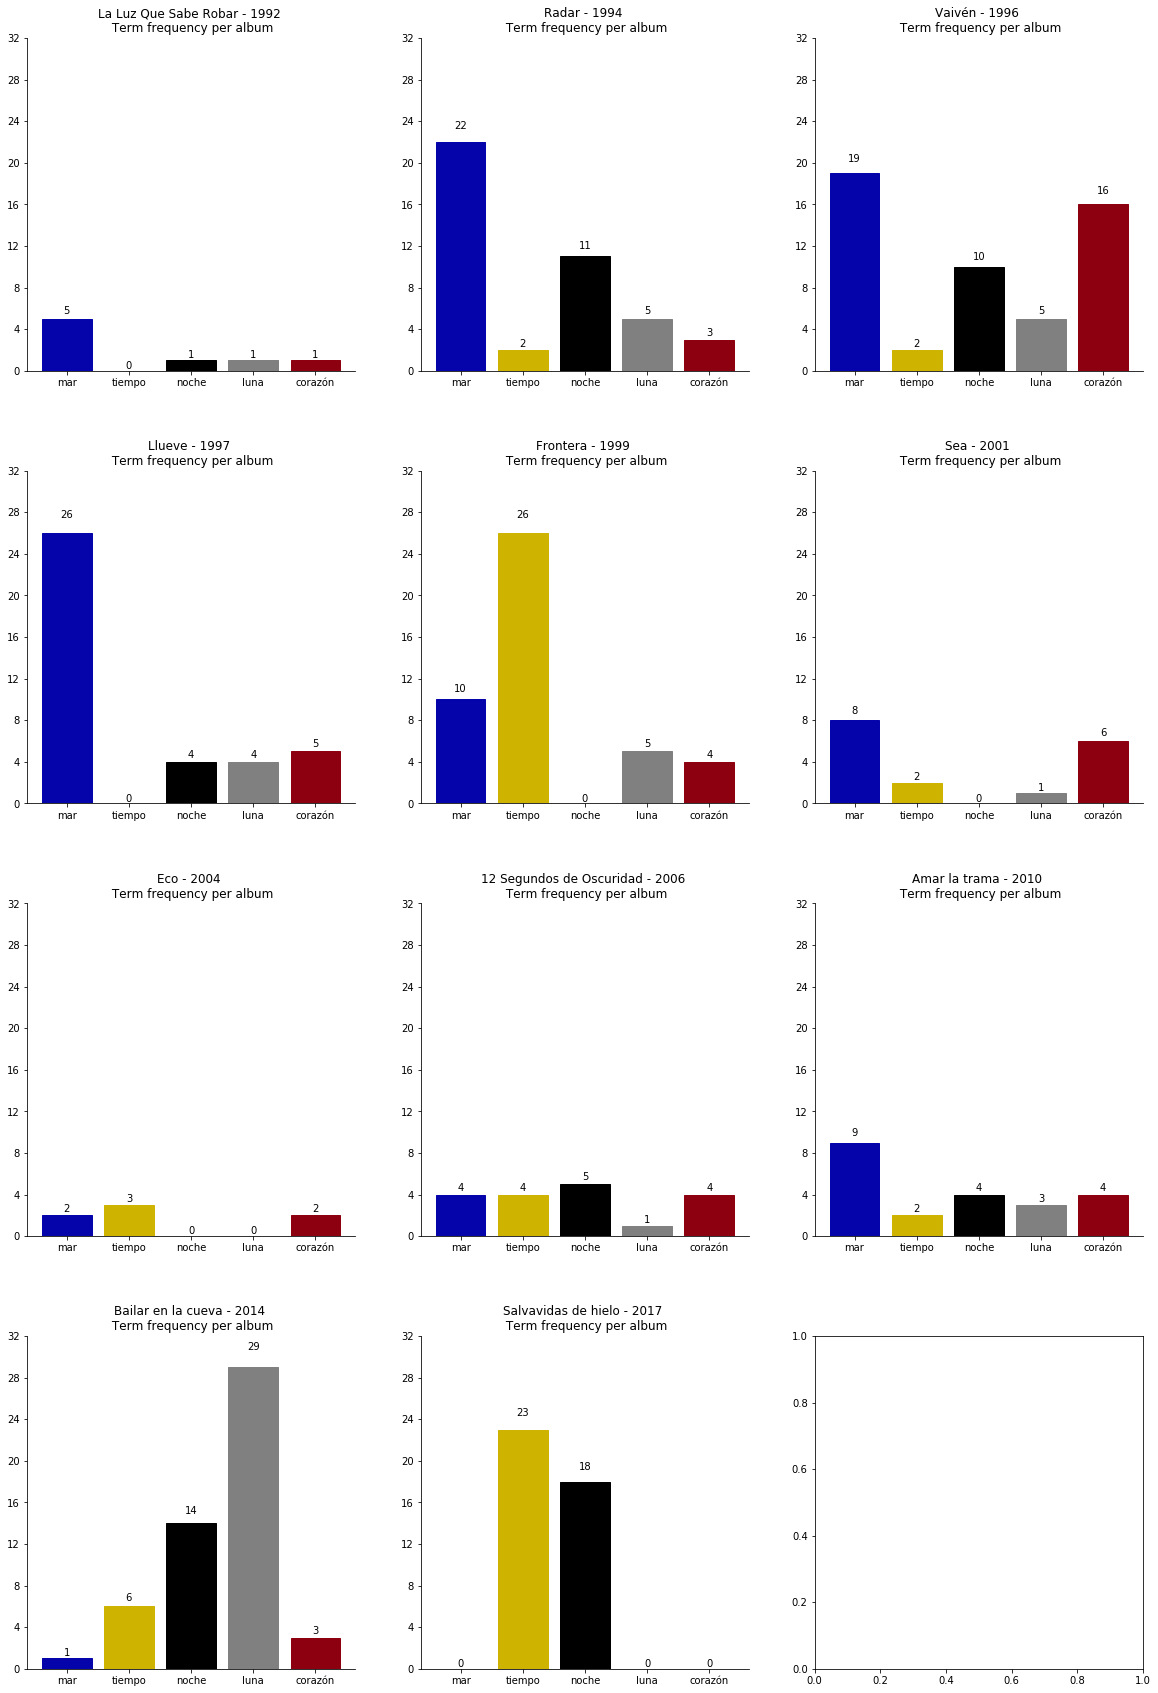

In [209]:
fig, axes = plt.subplots(nrows=ROWS, ncols=COLS, figsize=(20,30))

for row in range(ROWS):
    for col in range(COLS):
        if not albums_ordered_by_year:
            break
        an_album_title = albums_ordered_by_year.pop(0)
        an_album_year = years_for_albums.pop(0)
        an_album = words_by_album[an_album_title]
        rects = axes[row, col].bar(range(len(an_album)), list(an_album.values()), align='center')
        axes[row, col].set_xticks(range(len(an_album)))
        axes[row, col].set_xticklabels(list(an_album.keys()))
        axes[row, col].yaxis.set_major_locator(MaxNLocator(integer=True))
        axes[row, col].set_ylim([0,max_appearance + 3])
        axes[row, col].set_title("%s - %d \n Term frequency per album" % (an_album_title, an_album_year))
        axes[row, col].spines['right'].set_visible(False)
        axes[row, col].spines['top'].set_visible(False)
        rects[0].set_color('xkcd:royal blue')
        rects[1].set_color('xkcd:mustard')
        rects[2].set_color('black')
        rects[3].set_color('grey')
        rects[4].set_color('xkcd:crimson')
        autolabel(rects, row, col)

plt.subplots_adjust(hspace = 0.3)
plt.show()

## Interesting insight:
    - He loved talking about the sea ('mar') in the 90's but grew bored as time passed by.
    - After a time in his albums where he doesn't revisit his favorite terms a lot, comes back to monothematic stuff.
    - Bailar en la cueva is super focused on the moon ('luna') and the night ('noche').
    - Salvavidas de hielo is about the pass of time ('tiempo'), a trend which he recovered from Frontera, and again, the night ('noche').

In [160]:
words_by_year = pd.DataFrame(words_by_year).transpose()

In [176]:
values_for_y_ticks = []
for a_word in words_by_year.columns:
    values_for_y_ticks.extend(words_by_year[a_word].unique())
values_for_y_ticks = list(set(values_for_y_ticks))

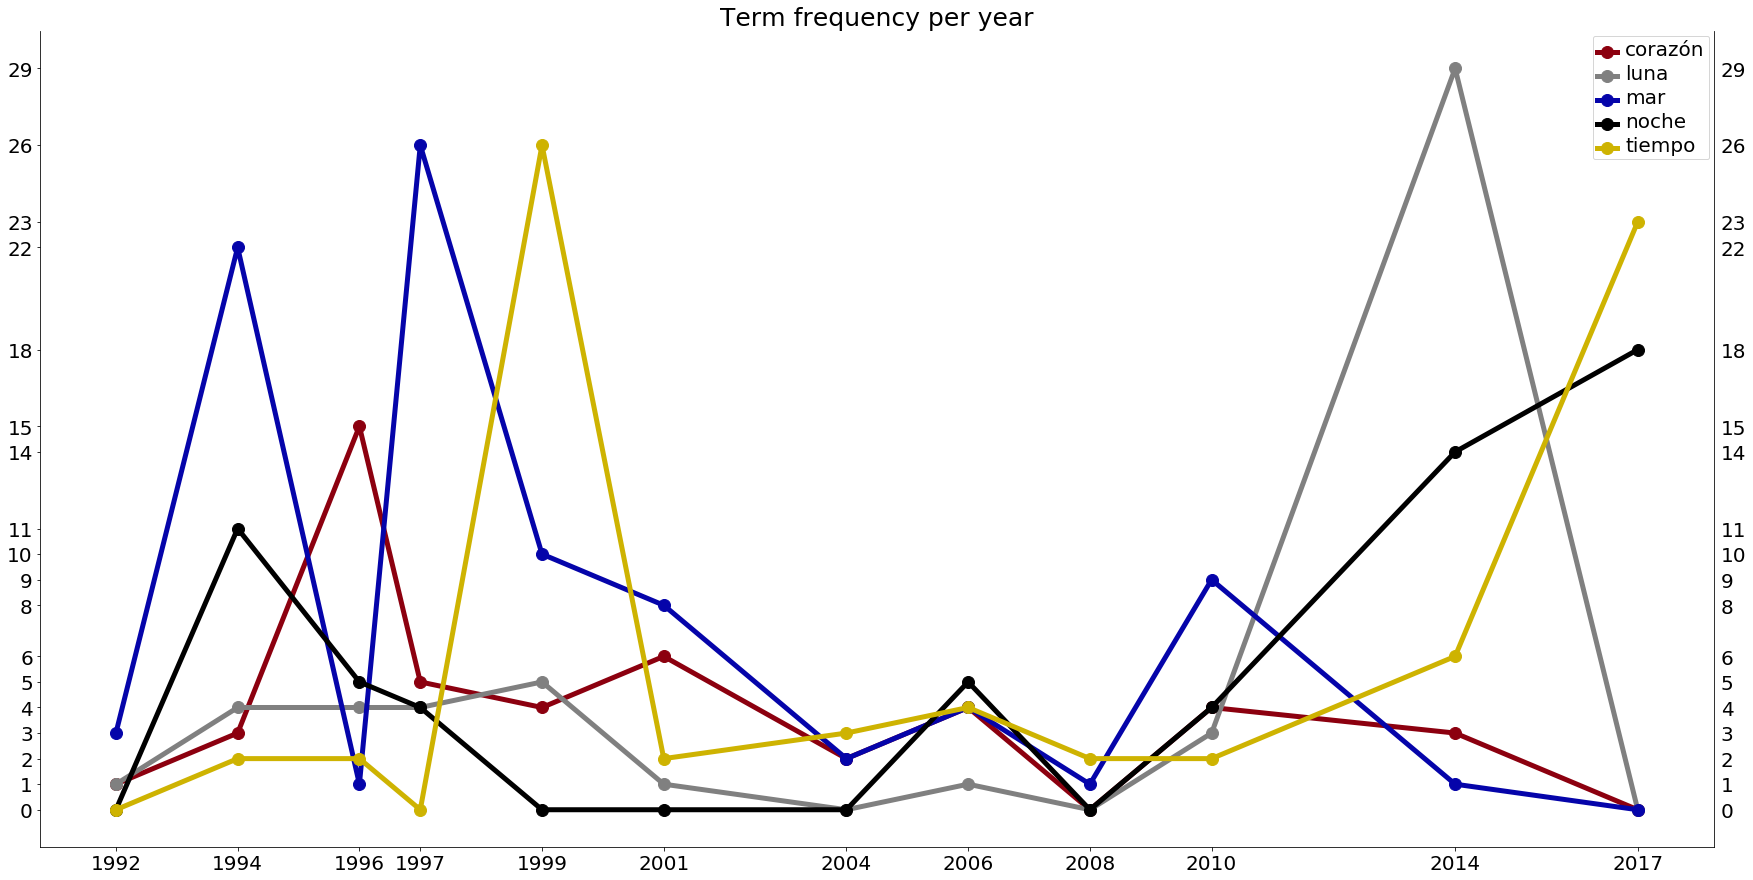

In [185]:
fig, ax = plt.subplots(figsize=(30,15))
for top_word in list(words_by_year.columns):
    ax.plot(
        words_by_year.index, 
        words_by_year[top_word], 
        '-', 
        color=colormap[top_word], 
        linewidth=5, 
        marker='o',
        markersize=12
    )
leg = plt.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(5)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize(20)
plt.xticks(words_by_year.index)
plt.yticks(values_for_y_ticks)
ax.spines["top"].set_visible(False)
plt.tick_params(axis='both', labelright=True, labelsize=20)
ax.set_title("Term frequency per year", fontdict={'fontsize': 25})
plt.show()

Int64Index([1992, 1994, 1996, 1997, 1999, 2001, 2004, 2005, 2006, 2008, 2010,
            2014, 2016, 2017],
           dtype='int64')